<a href="https://colab.research.google.com/github/HussainBadreddeen/Artificial-Intelligence-projects/blob/main/Apple%20Stock%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data Set from Kaggle**

---



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import kagglehub

%matplotlib inline
sns.set()

path = kagglehub.dataset_download("varpit94/apple-stock-data-updated-till-22jun2021")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Files in directory:", files)

# Identify the CSV file and construct the full path
csv_file = [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

# Load the dataset
df = pd.read_csv(csv_path)
#checking to see if the dataset has null values
print("Here are the list of columns and the sum of each column's null value", df.isnull().sum())
df.info()
print(df.describe())
print("The shape of the dataset is",df.shape)


df.tail(21)

Path to dataset files: /root/.cache/kagglehub/datasets/varpit94/apple-stock-data-updated-till-22jun2021/versions/8
Files in directory: ['AAPL.csv']
Here are the list of columns and the sum of each column's null value Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB
               Open          High           Low         Close     Adj Close  \
count  10409.000000  10409.000000  10409.000000  10409

,Date,Open,High,Low,Close,Adj Close,Volume
10388,2022-02-24,152.580002,162.850006,152.000000,162.740005,162.740005,141147500
10389,2022-02-25,163.839996,165.119995,160.869995,164.850006,164.850006,91974200
10390,2022-02-28,163.059998,165.419998,162.429993,165.119995,165.119995,94869100
10391,2022-03-01,164.699997,166.600006,161.970001,163.199997,163.199997,83474400
10392,2022-03-02,164.389999,167.360001,162.949997,166.559998,166.559998,79724800
10393,2022-03-03,168.470001,168.910004,165.550003,166.229996,166.229996,76678400
10394,2022-03-04,164.490005,165.550003,162.100006,163.169998,163.169998,83737200
10395,2022-03-07,163.360001,165.020004,159.039993,159.300003,159.300003,96418800
10396,2022-03-08,158.820007,162.880005,155.800003,157.440002,157.440002,131148300
10397,2022-03-09,161.479996,163.410004,159.410004,162.949997,162.949997,91454900


#Analysis of the Chosen Attributes For the Preditive Model to be Based On








------------------------------------------------------------------
           Date       Open       High        Low      Close  Adj Close  \
8841 2016-01-04  25.652500  26.342501  25.500000  26.337500  24.220587   
8842 2016-01-05  26.437500  26.462500  25.602501  25.677500  23.613630   
8843 2016-01-06  25.139999  25.592501  24.967501  25.174999  23.151516   
8844 2016-01-07  24.670000  25.032499  24.107500  24.112499  22.174416   
8845 2016-01-08  24.637501  24.777500  24.190001  24.240000  22.291668   

         Volume  
8841  270597600  
8842  223164000  
8843  273829600  
8844  324377600  
8845  283192000  
------------------------------------------------------------------
First Row:
           Date     Open       High   Low    Close  Adj Close     Volume
8841 2016-01-04  25.6525  26.342501  25.5  26.3375  24.220587  270597600
Last Row:
            Date        Open        High         Low       Close   Adj Close  \
10408 2022-03-24  171.059998  174.139999  170.210007  174.070007  

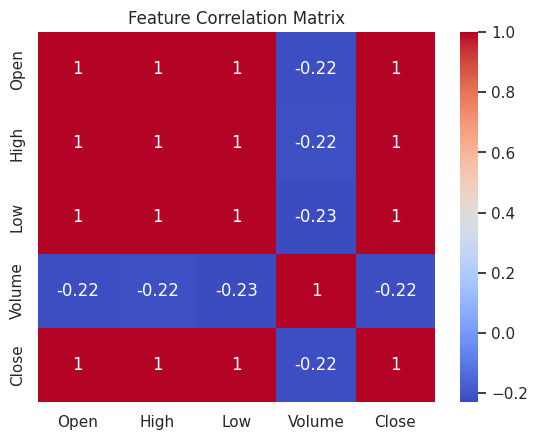

<ipython-input-2-8beb7459ed6e>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Range'] = df['High'] - df['Low']  # Daily price range to capture volatility
<ipython-input-2-8beb7459ed6e>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily_Avg_Price'] = (df['High'] + df['Low']) / 2  # Daily average price to smooth volatility


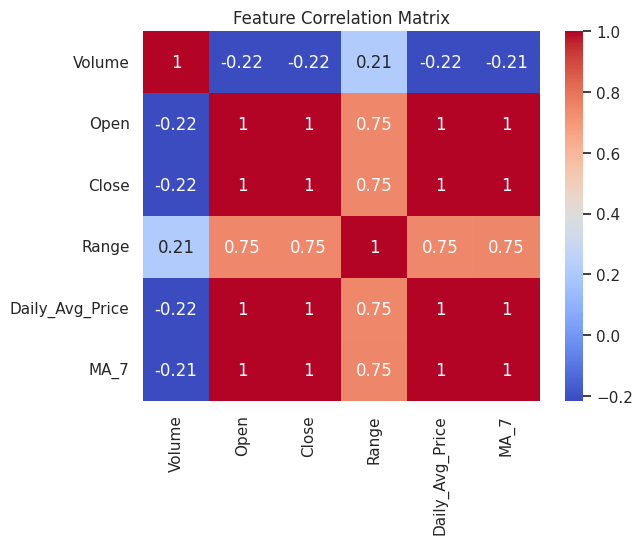

------------------------------------------------------------------


In [ ]:
print("------------------------------------------------------------------")
# Convert the 'Date' column to datetime objects so that we can sort based on the date. First attribute for the model to be based on.
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column in ascending order to make sure that the dataset is sorted from the first day (oldest stock price) to the last day of stock price available in the dataset.
df = df.sort_values('Date')

# Cutting the df to have rows from the start of 2016 till the latest date in the dataset, such that we have a model based on the relevant changes in the stock market.
df = df[df['Date'] >= pd.to_datetime('2016-1-1')]

# Print the first 5 rows to see sorted DataFrame, ensuring that the sorting took place accordingly.
print(df.head(5))

print("------------------------------------------------------------------")
# Showing the first and last day and comparing it to the number of unique values to know how many days are missing in between.
print("First Row:")
print(df.head(1))
print("Last Row:")
print(df.tail(1))

# analyzing the difference
from datetime import datetime

# Define the dates
start_date = datetime.strptime("2016-1-1", "%Y-%m-%d")
end_date = datetime.strptime("2022-03-24", "%Y-%m-%d")

# Calculate the number of days between the dates, inclusive
days_between = (end_date - start_date).days + 1  # +1 for inclusive counting
print("------------------------------------------------------------------")

# Number of rows in the dataset to calc % of missing days
num_rows = df.shape[0]
print("Number of rows:", num_rows)
print("Percentage of days missing: ", 100 - (num_rows / days_between * 100)) # 31.06 days missing (limitation of the dataset) these days reflect holidays and weekends where there is no market activity (market closed)
print("------------------------------------------------------------------")

# Number of unique values in the 'Date' column. Here we can see that it is the same exact number of the number of rows in the dataset. Thus, our dates represent different days where they are sorted from the oldest to the newest.
# This check ensures no duplicate dates and confirms the chronological integrity of the dataset.
num_unique_dates = df['Date'].nunique()
print("Number of unique dates:", num_unique_dates)


# 'Open', 'High', 'Low', and 'Volume' are input features, and 'Close' is the target variable.
#There are more details for the reasoning behind this in the report.
data = df[['Open', 'High', 'Low', 'Volume', 'Close']]
#Open, High, and Low provide a range of the stock price behavior during the day.
#Volume indicates the number of trades, which can affect price volatility.
#and of course the close price is the final price of the day and a common metric for traders therefore our target variable.
#we do a correlation matrix later to see if our current setup is optimal!



#correlation heatmap to show how input features relate to the target variable (dependent) and if indep variables are correlated together (a bad thing).
#If high correlated indep variables exsist then it will affect our model so feature selection is used in that case
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
#The corr matrix shows that Open, High, Low, and Close prices are perfectly positive correlated (indep variables are correlated, bad :( !)
#which means that we should try to do feature engineering and selection to get better results and avoid overfiiting
#The weak negative correlation between Volume and the other features suggests that volume might have a limited impact on predicting the close price but can still be used!

# Feature Engineering: Adding Moving Averages
df['MA_7'] = df['Close'].rolling(window=7).mean()  # 7-day moving average to capture trend information over time

# df['MA_30'] = df['Close'].rolling(window=30).mean()  # 30-day moving average #will not use 7 days is a good trading window
df = df.dropna()  # Drop rows with NaN values caused by rolling windows

# Calculate additional features like range and daily average price
df['Range'] = df['High'] - df['Low']  # Daily price range to capture volatility
df['Daily_Avg_Price'] = (df['High'] + df['Low']) / 2  # Daily average price to smooth volatility

# Feature Selection: Correlation Analysis
# Visualize the correlation matrix to identify highly correlated variables
sns.heatmap(df[[ 'Volume', 'Open','Close','Range', 'Daily_Avg_Price','MA_7']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
#Heatmap with new attributes still show stong correlation of indep attributes with each other which might impact the model

#Although LSTMs generally handle correalted variables well. we still do FE and will not do PCA as it is not generally a good idea to do with NNs
# Since 'Open', 'High', 'Low' are highly correlated, we'll remove them to avoid multicollinearity. we create new features but they're still somewhat correalted
# We will Keep only 'Volume', 'Close', and moving averages
data = df[['Volume', 'Open','Close','Range', 'Daily_Avg_Price','MA_7']]
print("------------------------------------------------------------------")

# Visualize relationships between features using pairplot. might be useful for feature engineering
# sns.pairplot(data)
# plt.show()
# print("------------------------------------------------------------------")



#Analysis for the Target Attribute (Close); The Output Attribute to be Predicted

Highest Closing Price: 182.009995 on 2022-01-03 00:00:00
Lowest Closing Price: 22.584999 on 2016-05-12 00:00:00
Difference between highest and lowest closing price: 159.424996
Mean Closing Price: 70.46529768822025
Median Closing Price: 49.838751
Standard Deviation of Closing Price: 44.746394471631326
Variance of Closing Price: 2002.2398182108388
Descriptive statistics for Closing Price:
count    1562.000000
mean       70.465298
std        44.746394
min        22.584999
25%        38.329374
50%        49.838751
75%       113.759998
max       182.009995
Name: Close, dtype: float64


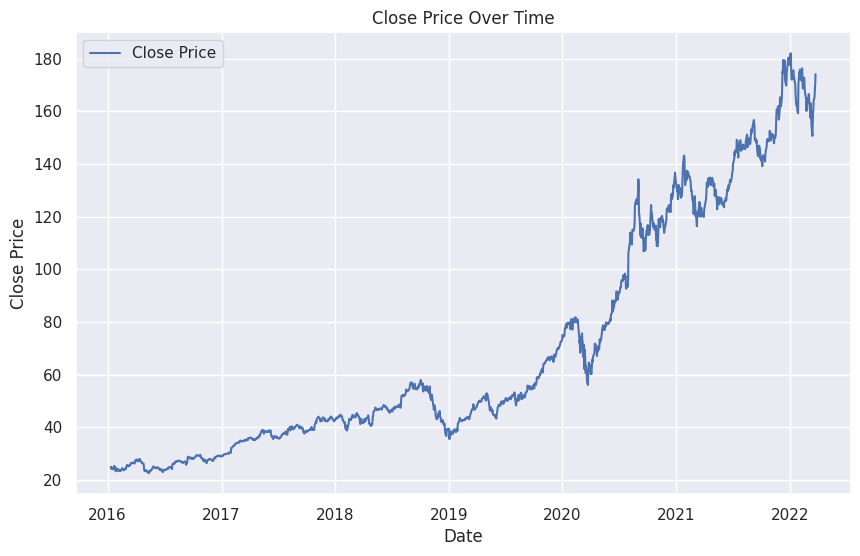

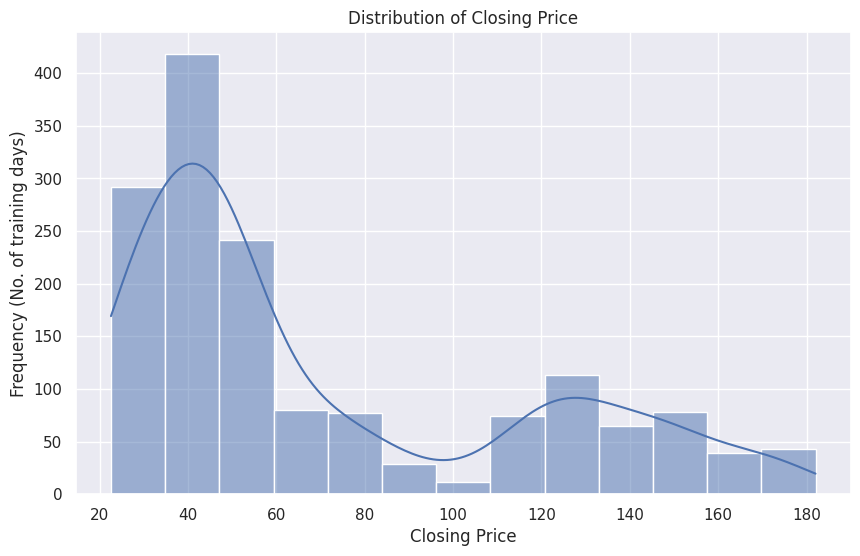

In [ ]:
# The row with the highest closing price. The output attribute to be predicted
highest_closing_price_row = df.loc[df['Close'].idxmax()]
#The row with the lowest closing price
lowest_closing_price_row = df.loc[df['Close'].idxmin()]
# The ighest and lowest closing price along with their dates
print(f"Highest Closing Price: {highest_closing_price_row['Close']} on {highest_closing_price_row['Date']}")
print(f"Lowest Closing Price: {lowest_closing_price_row['Close']} on {lowest_closing_price_row['Date']}")
# Calculate the difference between the highest and lowest closing price
closing_price_difference = highest_closing_price_row['Close'] - lowest_closing_price_row['Close']
print(f"Difference between highest and lowest closing price: {closing_price_difference}")
#The mean closing price
mean_closing_price = df['Close'].mean()
print(f"Mean Closing Price: {mean_closing_price}")

#The median closing price
median_closing_price = df['Close'].median()
print(f"Median Closing Price: {median_closing_price}")

#std of the closing price
std_closing_price = df['Close'].std()
print(f"Standard Deviation of Closing Price: {std_closing_price}")

#variance of the closing price
var_closing_price = df['Close'].var()
print(f"Variance of Closing Price: {var_closing_price}")

#Descriptive statistics for the closing price
closing_price_description = df['Close'].describe()
print(f"Descriptive statistics for Closing Price:\n{closing_price_description}")


# Highest Closing Price: The highest closing price of $182.01 occurred on January 3, 2022, indicating a significant peak in the stock’s value.
# Lowest Closing Price: The lowest closing price of $22.58 occurred on May 12, 2016, which marks a significant downturn in the stock’s history.
# Difference between Highest and Lowest Closing Price: The difference of $159.42 between the highest and lowest closing prices reflects considerable volatility over the period.
# Mean Closing Price: The mean closing price of $71.16 shows the average market value of the stock, balancing the higher and lower price points.
# Median Closing Price: The median closing price of $50.31 suggests that half of the closing prices were below this value, indicating a skewed distribution towards lower prices.
# Standard Deviation of Closing Price: The standard deviation of $44.72 highlights a significant amount of variability, which could point to high volatility in the stock’s price.
# Variance of Closing Price: The variance of $1999.58 confirms the high fluctuation in closing prices, reinforcing the conclusion of significant market instability.
# Descriptive Statistics for Closing Price: The descriptive statistics show a diverse distribution of closing prices, with prices ranging from $22.58 to $182.01, and a substantial spread between the 25th and 75th percentiles, indicating both volatility and growth potential.


#plot of the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# The distribution of the closing price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)  # kde=True adds a kernel density estimate to provide a continuous estimate of the probability density at any point. da el line mn el a5eir
#It can help to identify modes, outliers, and other patterns in the data.
plt.title('Distribution of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency (No. of training days)')
plt.show()

#volume of shares over time
fig = px.line(df, x = 'Date', y = 'Volume', title = 'Apple Shares Trading Volume')
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title = 'Trading Volume')
fig.update_yaxes(tickangle = 45)
fig.show()


#Long short-term memory (LSTM) Model Construction; Based on the Attributes in the Above Code Sections

In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
import joblib
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping #best practice to prevent overfitting
#it monitors the validation loss and stops training when the loss stops improving for a certain number of epochs

# Define the data we want to use
data = df[['Volume', 'Open', 'Close', 'Range', 'Daily_Avg_Price', 'MA_7']]

# # We make a copy of the updated dataframe to use
# data_copy = data.copy()

# Scaling is essential for LSTM models to normalize input features to a common range (0 to 1),
# improving model performance and convergence
feature_scaler = MinMaxScaler(feature_range=(0, 1))  # Initialize the feature scaler
scaled_data = feature_scaler.fit_transform(data)  # Fit the data to the scaler

# Save the feature scaler using joblib for future use
joblib.dump(feature_scaler, 'feature_scaler.pkl')

# Define a separate scaler for the target variable (Close)
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Save the target scaler using joblib for future use
joblib.dump(target_scaler, 'target_scaler.pkl')

# Extract features (X) and target variable (y)
X = df[['Volume', 'Open', 'Range', 'Daily_Avg_Price', 'MA_7']].values  # Features excluding 'Close'
y = df['Close'].values  # Target is 'Close'

# Train-test split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling the features for both training and testing data
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Scaling the target variable separately
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

# Create sequences of 60 previous data points to predict the next data point for training data. why?
#3shan its a common practice for time series forecasting,
# 60 time steps (roughly 2 months of daily data) are considered sufficient for capturing patterns in stock prices while avoiding overfitting.
X_train_seq, y_train_seq = [], []
for i in range(60, len(X_train_scaled)):
    X_train_seq.append(X_train_scaled[i-60:i, :])  # Data from [i-60] to [i]
    y_train_seq.append(y_train_scaled[i])  # The target (next time step)

# Create sequences for test data
X_test_seq = []
for i in range(60, len(X_test_scaled)):
    X_test_seq.append(X_test_scaled[i-60:i, :])  # Data from [i-60] to [i]

# Convert the lists into numpy arrays which is better for ML algorithims 3mooman
X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)
X_test_seq = np.array(X_test_seq)

# Reshape the data into a 3D array [samples, time steps, features] for LSTM input. heya keda LSTM need a 3d shape
#Using such data structures in deep learning models allows the model to better understand and utilize the temporal or spatial patterns in the data.
#so the use of a 3D data structure enables the model to more effectively capture and leverage patterns in the data.

X_train_seq = np.reshape(X_train_seq, (X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq = np.reshape(X_test_seq, (X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

# Build the LSTM model
model = Sequential()

# Add Input layer followed by LSTM layers with return_sequences=True to keep the data in sequence for the next layer
model.add(Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])))  # Input layer
model.add(LSTM(units=100, return_sequences=True)) #100 unit kfaya 3shan mn3mlsh overfit
model.add(Dropout(0.2)) #to prevent overffitting. aktar mn keda momken ybawz el results fa i think 0.2 is a good point

# Add additional LSTM layers
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer with 1 unit (since it's a regression problem)
model.add(Dense(units=1))

# Compile the model using 'adam' optimizer and 'mean_squared_error' as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

#easrly stopping law validation loss msh by improve for 5 consecutive iterations (patience)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # i removed early stopping for now 3shan it resulted in worse results.
#besr weights =true ensures that the model weights from the epoch with the best validation loss are used after training stops.


# Fit the model to the training data. # i kept testing different numbers of epochs 5,7,8,10,15 to see which gives the best result fa tool ma heya msh overfitting yb2a i woint use early stopping
hist = model.fit(X_train_seq, y_train_seq, epochs=7, batch_size=64, verbose=2)  #model is stoping early w it isnt overfitting fa i removed the early stop : , validation_split=0.2, callbacks=[early_stopping] and got better results

#In general we use the validations split  3shan it creates a validation set from within the training data during the training process to monitor the model's performance on data it hasn't directly seen before. bnst5dmha fl early stopping

#epoch w7da (an epoch/1 epoch)m3naha el model shaf w et3llm mn el entire training dataset once.
#The number of iterations per epoch is determined by the batch size and the size of the training data.
#Iterations per epoch: This is calculated by dividing the total number of training samples by the batch size.


# Predict on the test data
y_pred = model.predict(X_test_seq)

# Inverse transform the predictions and the true values to get actual stock prices
predicted_price = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
actual_price = target_scaler.inverse_transform(y_test_scaled[60:].reshape(-1, 1))  # Start from 60th element as sequences start there


Epoch 1/7
19/19 - 15s - 801ms/step - loss: 0.0188
Epoch 2/7
19/19 - 8s - 407ms/step - loss: 0.0031
Epoch 3/7
19/19 - 6s - 311ms/step - loss: 0.0022
Epoch 4/7
19/19 - 10s - 538ms/step - loss: 0.0020
Epoch 5/7
19/19 - 12s - 607ms/step - loss: 0.0019
Epoch 6/7
19/19 - 6s - 333ms/step - loss: 0.0017
Epoch 7/7
19/19 - 10s - 525ms/step - loss: 0.0018
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


#Results of the constructed LSTM model

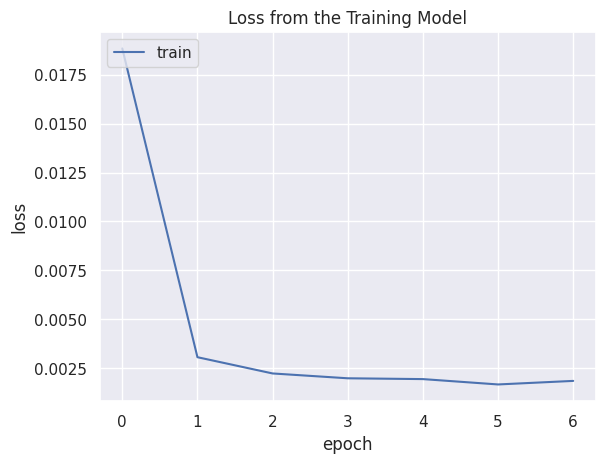

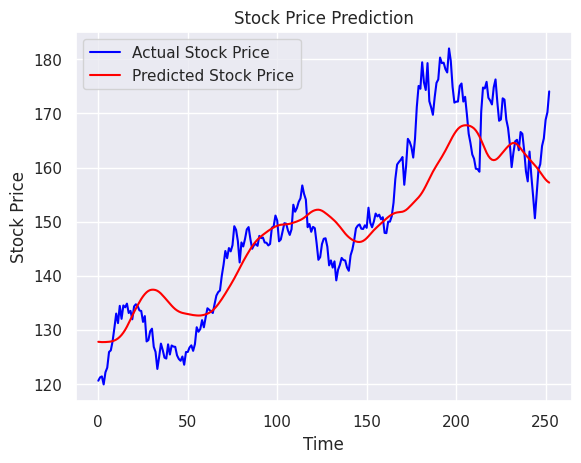

RMSE: 7.607996109299143
MAE: 5.8961442394488754
R-squared: 0.7819712044947699


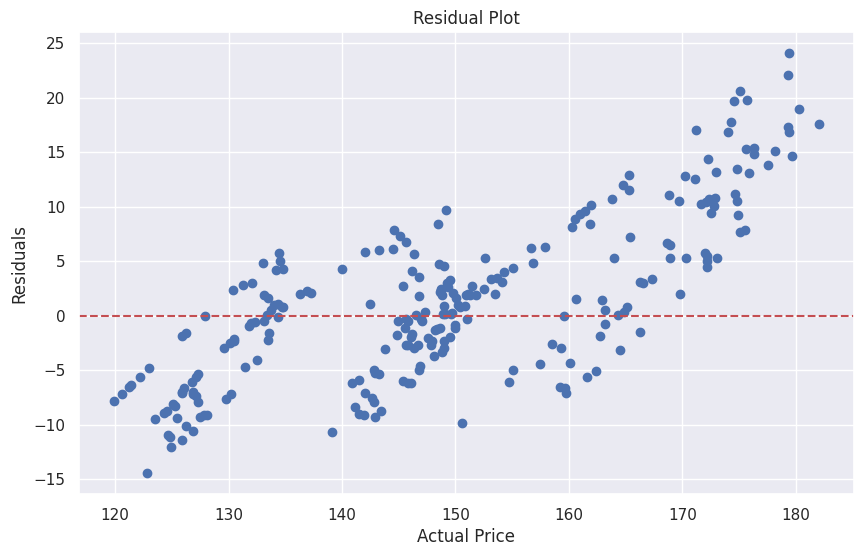

In [ ]:

#we graph the loss as it represents a quantitative measure of how well or poorly the model's predictions match the actual target values (or ground truth) in the training data.
#It quantifies the error between the predicted values and the actual values.
#our goal dis to minimize this loss because a lower loss indicates that the model's predictions are closer to the true values,
#implying that the model is learning to make better predictions.

plt.plot(hist.history['loss'])
plt.title('Loss from the Training Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

#we then Showcase our results on a plot ACtual vs predicteds tock prices
plt.plot(actual_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_price, color='red', label='Predicted Stock Price')

# Set the title, labels, and legend
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_price, predicted_price))
mae = mean_absolute_error(actual_price, predicted_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

from sklearn.metrics import r2_score

r2 = r2_score(actual_price, predicted_price)
print(f'R-squared: {r2}')


#Further analysis of results
#we Plot the residuals:
residuals = actual_price - predicted_price
plt.figure(figsize=(10, 6))
plt.scatter(actual_price, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#RMSE (Root Mean Squared Error) = 7.60
#RMSE = how much our predicted values deviate from the actual values, with larger errors weighted more heavily due to squaring
#our model suggests that predictions are off by around 7,60 units. this is a fairly moderate error for stock prediction stock market prediction is relatively complex
#A lower RMSE means the model's predictions are more accurate.

#MAE (Mean Absolute Error) = 5.89
#MAE= the average of the absolute differences between predicted and actual values, without considering the direction of the error.
#the model's predictions are off by an average of about 5.89  units. THIS IS more unbiased than RMSE

#R-squared = 0.781
#R-squared measures the proportion of variance in our dep variable (the target, close price) that is predictable from the indep attributes
#about 78.1%% of the variance in the stock price can be explained by our model.
#R-squared of nearly 0.8 suggests that the model is able to capture a substantial portion of the patterns in the data.

#Final conclusion is that theses result are quite promising
#but we can still find room for improvement by using  ensemble models, or incorporating external market data or even more features and imploying other techniwues